<a href="https://colab.research.google.com/github/mazibazi/ML_online_shoppers/blob/main/MLRahnama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from google.colab import drive

from pandas_profiling import ProfileReport 

from sklearn.impute import SimpleImputer

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading the CsV throw Driver

In [15]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RahnamaProject/dataset.csv')
df.head()

Administrative  Administrative_Duration  ...  Weekend  Revenue
0             0.0                      0.0  ...    False    False
1             0.0                      0.0  ...    False    False
2             0.0                      0.0  ...    False    False
3             0.0                      0.0  ...    False    False
4             0.0                      NaN  ...     True    False

[5 rows x 18 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12215 non-null  float64
 1   Administrative_Duration  12225 non-null  float64
 2   Informational            12196 non-null  float64
 3   Informational_Duration   12204 non-null  float64
 4   ProductRelated           12196 non-null  float64
 5   ProductRelated_Duration  12191 non-null  float64
 6   BounceRates              12216 non-null  float64
 7   ExitRates                12208 non-null  float64
 8   PageValues               12222 non-null  float64
 9   SpecialDay               12201 non-null  float64
 10  Month                    12212 non-null  object 
 11  OperatingSystems         12214 non-null  float64
 12  Browser                  12218 non-null  float64
 13  Region                   12204 non-null  float64
 14  TrafficType           


**Description**
From info we can say we have 18 coloumns and 17 feature, number of rows should be 12330, therfore we have some NA. Also, some data are reported as Numerical and other are categorical. 
In the next code, Descriptive statistics  each feature have been summarized. 


In [18]:
for i in range(0, 18):
    data_describe = df.iloc[:, i].describe()
    print(str("\n") + "--" * 7 + str(df.columns[i]) + "--" * 7)
    print(data_describe)


--------------Administrative--------------
count    12215.000000
mean         2.315759
std          3.319969
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

--------------Administrative_Duration--------------
count    12225.000000
mean        80.741179
std        176.660783
min          0.000000
25%          0.000000
50%          7.000000
75%         92.750000
max       3398.750000
Name: Administrative_Duration, dtype: float64

--------------Informational--------------
count    12196.000000
mean         0.502706
std          1.271342
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

--------------Informational_Duration--------------
count    12204.000000
mean        34.733067
std        141.364602
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max    

# Dealing with NA

Fisrt the rate of Missing percent has been estimated TrafficType has higher and Revenue has lower missing value

In [53]:
df1 = df
df1.head
df1.isnull()

df1.replace("NAN", np.nan, inplace=True)

missing_percentage = df1.isnull().sum() / df1.shape[0] *100
print("--" * 5, "Missing Percentage", "--" * 5)
print(missing_percentage)

---------- Missing Percentage ----------
Administrative             0.932685
Administrative_Duration    0.851582
Informational              1.086780
Informational_Duration     1.021898
ProductRelated             1.086780
ProductRelated_Duration    1.127332
BounceRates                0.924574
ExitRates                  0.989457
PageValues                 0.875912
SpecialDay                 1.046229
Month                      0.957015
OperatingSystems           0.940795
Browser                    0.908354
Region                     1.021898
TrafficType                1.224655
VisitorType                0.940795
Weekend                    1.062449
Revenue                    0.000000
dtype: float64


In [22]:
print("\n", "--" * 5, "Number of Null parameters\n", "--" * 5, "\n")
print(df1.isnull().sum())


 ---------- Number of Null parameters
 ---------- 

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64


removeing data, this method is not recommended

In [23]:
df.dropna(axis=0)

Administrative  Administrative_Duration  ...  Weekend  Revenue
0                 0.0                      0.0  ...    False    False
1                 0.0                      0.0  ...    False    False
3                 0.0                      0.0  ...    False    False
5                 0.0                      0.0  ...    False    False
6                 0.0                      0.0  ...    False    False
...               ...                      ...  ...      ...      ...
12325             3.0                    145.0  ...     True    False
12326             0.0                      0.0  ...     True    False
12327             0.0                      0.0  ...     True    False
12328             4.0                     75.0  ...    False    False
12329             0.0                      0.0  ...     True    False

[10376 rows x 18 columns]

First mode with adding random number

In [26]:
newdf1 = df1.fillna(method="ffill")
newdf1

Administrative  Administrative_Duration  ...  Weekend  Revenue
0                 0.0                      0.0  ...    False    False
1                 0.0                      0.0  ...    False    False
2                 0.0                      0.0  ...    False    False
3                 0.0                      0.0  ...    False    False
4                 0.0                      0.0  ...     True    False
...               ...                      ...  ...      ...      ...
12325             3.0                    145.0  ...     True    False
12326             0.0                      0.0  ...     True    False
12327             0.0                      0.0  ...     True    False
12328             4.0                     75.0  ...    False    False
12329             0.0                      0.0  ...     True    False

[12330 rows x 18 columns]

second mode with most frequent, since now "newdf" is assumed as database and future calculationa and visualiztion would be carried out on that.

In [60]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(df1)
newdf = imp.transform(df1)
newdf = pd.DataFrame(newdf)
newdf.columns = (['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
                  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                  'Weekend', 'Revenue'])
print("--" * 10 + "second mode with most frequent" + "--" * 10)
print(newdf)

--------------------second mode with most frequent--------------------
      Administrative Administrative_Duration  ... Weekend Revenue
0                  0                       0  ...   False   False
1                  0                       0  ...   False   False
2                  0                       0  ...   False   False
3                  0                       0  ...   False   False
4                  0                       0  ...    True   False
...              ...                     ...  ...     ...     ...
12325              3                     145  ...    True   False
12326              0                       0  ...    True   False
12327              0                       0  ...    True   False
12328              4                      75  ...   False   False
12329              0                       0  ...    True   False

[12330 rows x 18 columns]


# Data Visualiztion

This plot shows How many of are doing shopping on the Weekend

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

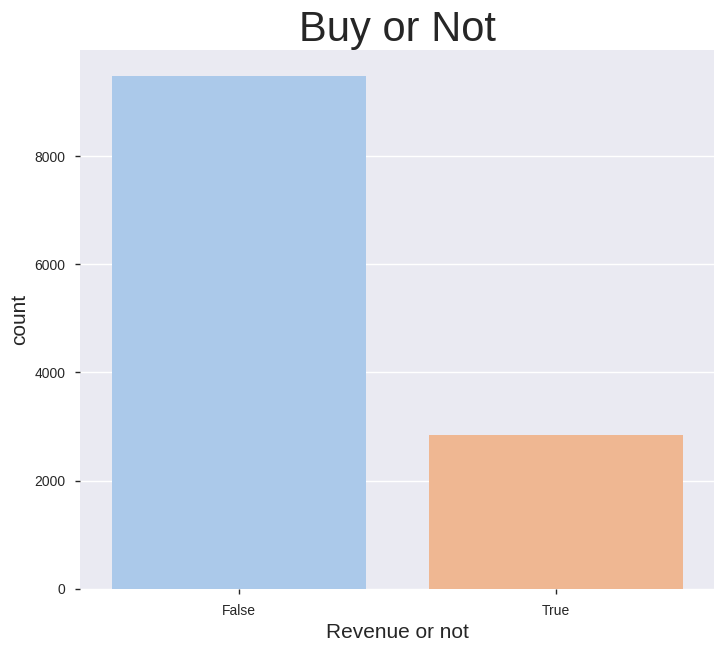

In [34]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)

sb.countplot(newdf['Weekend'], palette='pastel')
plt.title('Buy or Not', fontsize=30)
plt.xlabel('Revenue or not', fontsize=15)
plt.ylabel('count', fontsize=15)

Seven plots are showing the Revenue based on Month, OperatingSystems, Browser, Region, Traffic type, Visitor type and shopping on the weeked 

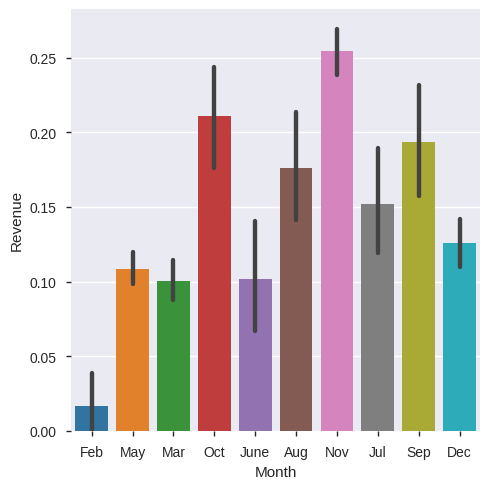

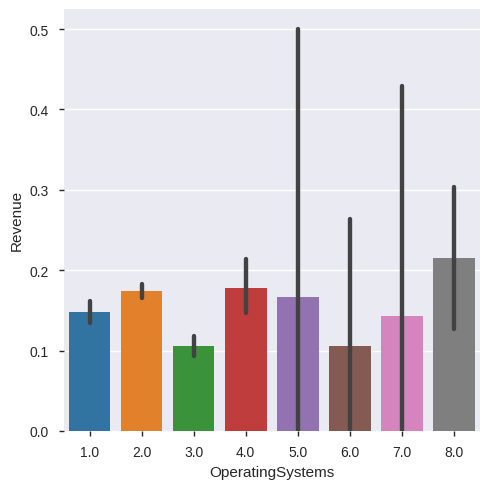

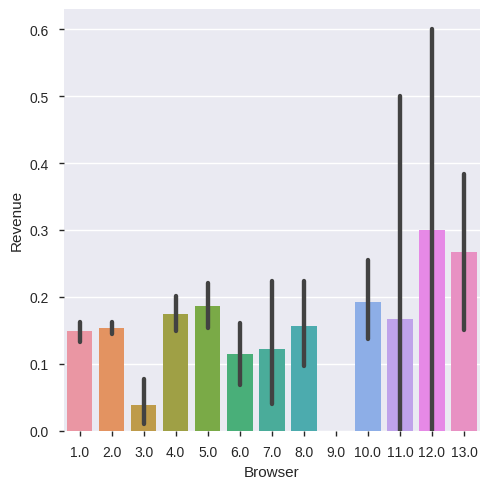

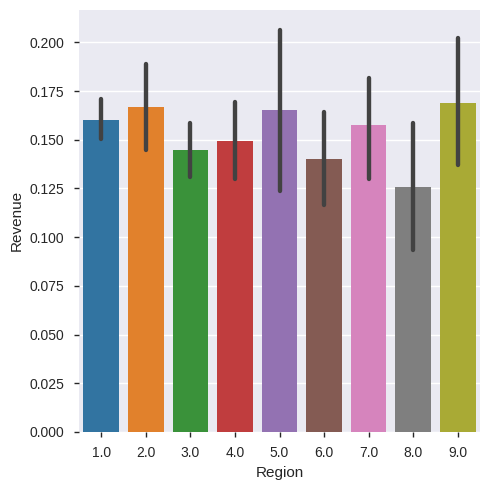

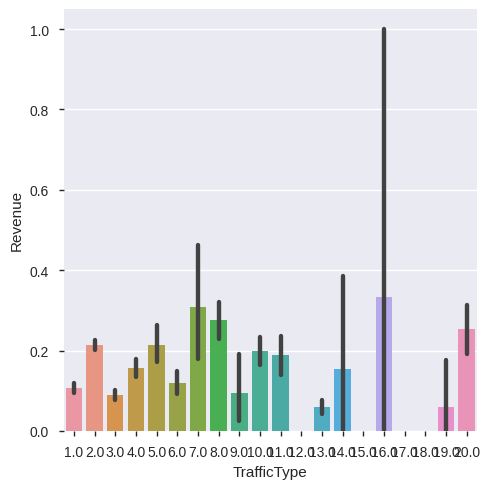

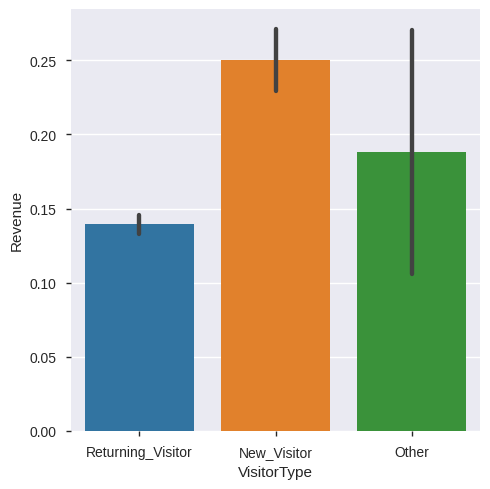

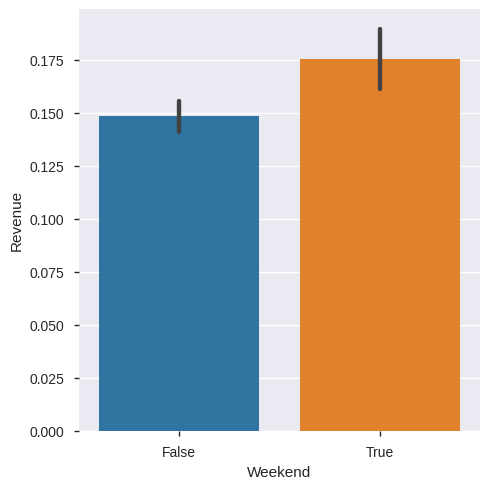

In [35]:
for i in range(10, 17):
    sb.catplot(x=df.columns[i], y="Revenue", kind="bar", data=newdf)

Profiling, in this way more plot would be developed <HTML>

In [ ]:
profile = ProfileReport(newdf)
profile.to_file("OperatingSystems")

# Matrxi and correlation

**NOTE:** Heat map could not fitted to colab so, I have attached in the Zip folder with ProfileReport.HTML


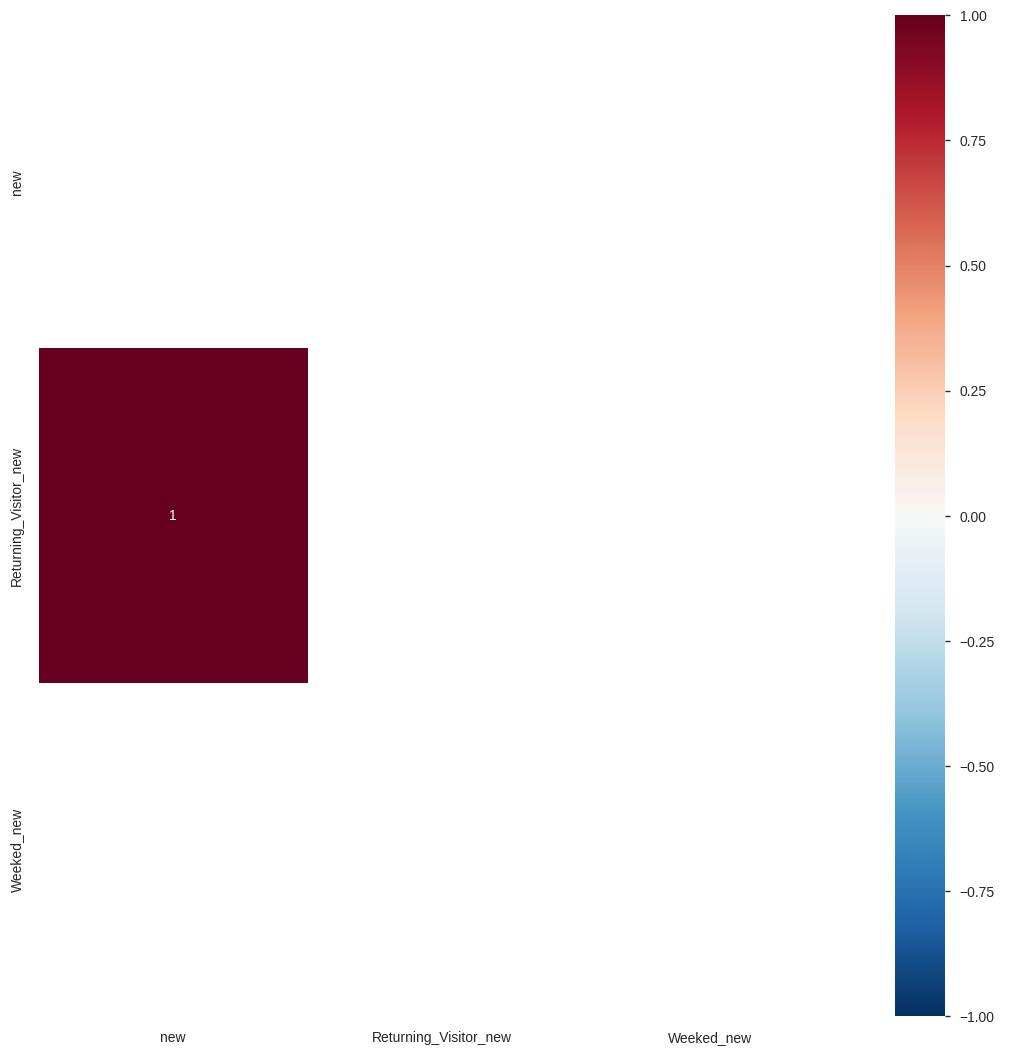

In [51]:
newdf.drop(newdf.columns[0], inplace=True, axis=1)


corr = newdf.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.rcParams['figure.figsize'] = (18, 7)
with sb.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,13))
    sb.heatmap(ax=ax, data=corr, mask=mask, annot=True, center=0, vmin=-1, vmax=1, cmap="RdBu_r");

# Dumy variable for deaking with categorical data and data preprocing

In [40]:
newdf.loc[:, "OperatingSystems"]
newdf.loc[:, "Browser"]
newdf.loc[:, "Region"]
newdf.loc[:, "TrafficType"]
newdf.loc[:, "VisitorType"]
newdf.loc[:, "Weekend"]
newdf.loc[:, "Month"]
newdf.loc[:, "Revenue"]

newdf.OperatingSystems.value_counts()  # 8
newdf.Browser.value_counts()  # 13
newdf.Region.value_counts()  # 9
newdf.TrafficType.value_counts()  # 20
newdf.VisitorType.value_counts()  # 3
newdf.Weekend.value_counts()  # 2
newdf.Month.value_counts()  # 10
newdf.Revenue.value_counts()  # 2


False    10422
True      1908
Name: Revenue, dtype: int64

--------- Feature -------------  Number of variable
1.   OperatingSystems                **8**
2.   Browser                          **13**
3.   Regin                            **9**
4.   TrafficeType                    **20**
5.   VisitorType                      **3**
6.   Weekend                          **2 (True, False)**
7.   Month                           **10**
8.   Revenue                         **2 (True, False)**




Old way and overwhelming which I would not do that, we have to make a new column with new future based on 1 and 0 but this method is not recommended so I go to discuss another method

In [63]:
newdfvar = newdf
newdfvar["Returning_Visitor_new"] = newdfvar.VisitorType.map({"Returning_Visitor": 2, "New_Visitor": 1, "Other": 0})
newdfvar["Weeked_new"] = newdfvar.VisitorType.map({True: 1, False: 0})

In [62]:
newdfvar

Administrative Administrative_Duration  ... Returning_Visitor_new Weeked_new
0                  0                       0  ...                     2        NaN
1                  0                       0  ...                     2        NaN
2                  0                       0  ...                     2        NaN
3                  0                       0  ...                     2        NaN
4                  0                       0  ...                     2        NaN
...              ...                     ...  ...                   ...        ...
12325              3                     145  ...                     2        NaN
12326              0                       0  ...                     2        NaN
12327              0                       0  ...                     2        NaN
12328              4                      75  ...                     2        NaN
12329              0                       0  ...                     1        NaN

[12330 rows x 20 columns]

dummies step way is discussed here. At first, I make a new variable to save newdf for the more advanced way in the future. From output in line 68 and 69 is obvious which I changed the columns with dummy methods


In [68]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(df1)
newdf = imp.transform(df1)
newdf = pd.DataFrame(newdf)
newdf.columns = (['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
                  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                  'Weekend', 'Revenue'])

newdfvar = newdf
newdfvar.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [70]:
VisitorType_dummies = pd.get_dummies(newdfvar.VisitorType, prefix="VisitorType").iloc[:, 1:]
newdfvar = pd.concat([newdfvar, VisitorType_dummies], axis=1)
newdfvar.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

With "get_dummies" in cell 71 automatically I make dummies, BUt in the next cell I want to develop a better Idea

In [71]:
newdfvar = newdf
newdfvar.shape

newdfvar = pd.get_dummies(newdfvar, columns=["OperatingSystems", "Browser",
                                             "Region", "TrafficType", "VisitorType",
                                             "Weekend", "Month", "Revenue"],
                          drop_first=True)

newdfvar.shape


(12330, 69)

 I prefer make it more advance with considering the week and mix method of Encoding and remake month a new approach in dataframe 

In [88]:
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(df1)
newdf = imp.transform(df1)
newdf = pd.DataFrame(newdf)
newdf.columns = (['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
                  'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
                  'Weekend', 'Revenue'])
newdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
newdf.drop(newdf.columns[0], inplace=True, axis=1)
{column: list(newdf[column].unique()) for column in newdf.columns if newdf.dtypes[column] == 'object'}

In [90]:
def ordinal_encode(newdf, column, ordering):
    newdf = newdf.copy()
    newdf[column] = newdf[column].apply(lambda x: ordering.index(x))
    return newdf



def onehot_encode(newdf, column, prefix):
    newdf = newdf.copy()
    dummies = pd.get_dummies(newdf[column], prefix=prefix)
    newdf = pd.concat([newdf, dummies], axis=1)
    newdf = newdf.drop(column, axis=1)
    return newdf

In [91]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
visitor_prefix = 'V'

In [92]:
newdf = ordinal_encode(newdf, 'Month',  month_ordering)
newdf = onehot_encode(newdf, 'VisitorType',visitor_prefix)

newdf['Weekend'] = newdf['Weekend'].astype(np.int)
newdf['Revenue'] = newdf['Revenue'].astype(np.int)
newdf.drop('V_Other', inplace=True, axis=1)

**newdf** now is ready to do ML on this databse

In [97]:
print(newdf.columns, '\nShape:',newdf.shape)

Index(['Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'Weekend', 'Revenue', 'V_New_Visitor',
       'V_Returning_Visitor'],
      dtype='object') 
Shape: (12330, 18)


# Drawing the HUGE ***Pairplot*** to show all relations between parameters **bold text**
A fugure of this pair plot is attached in the Zip file

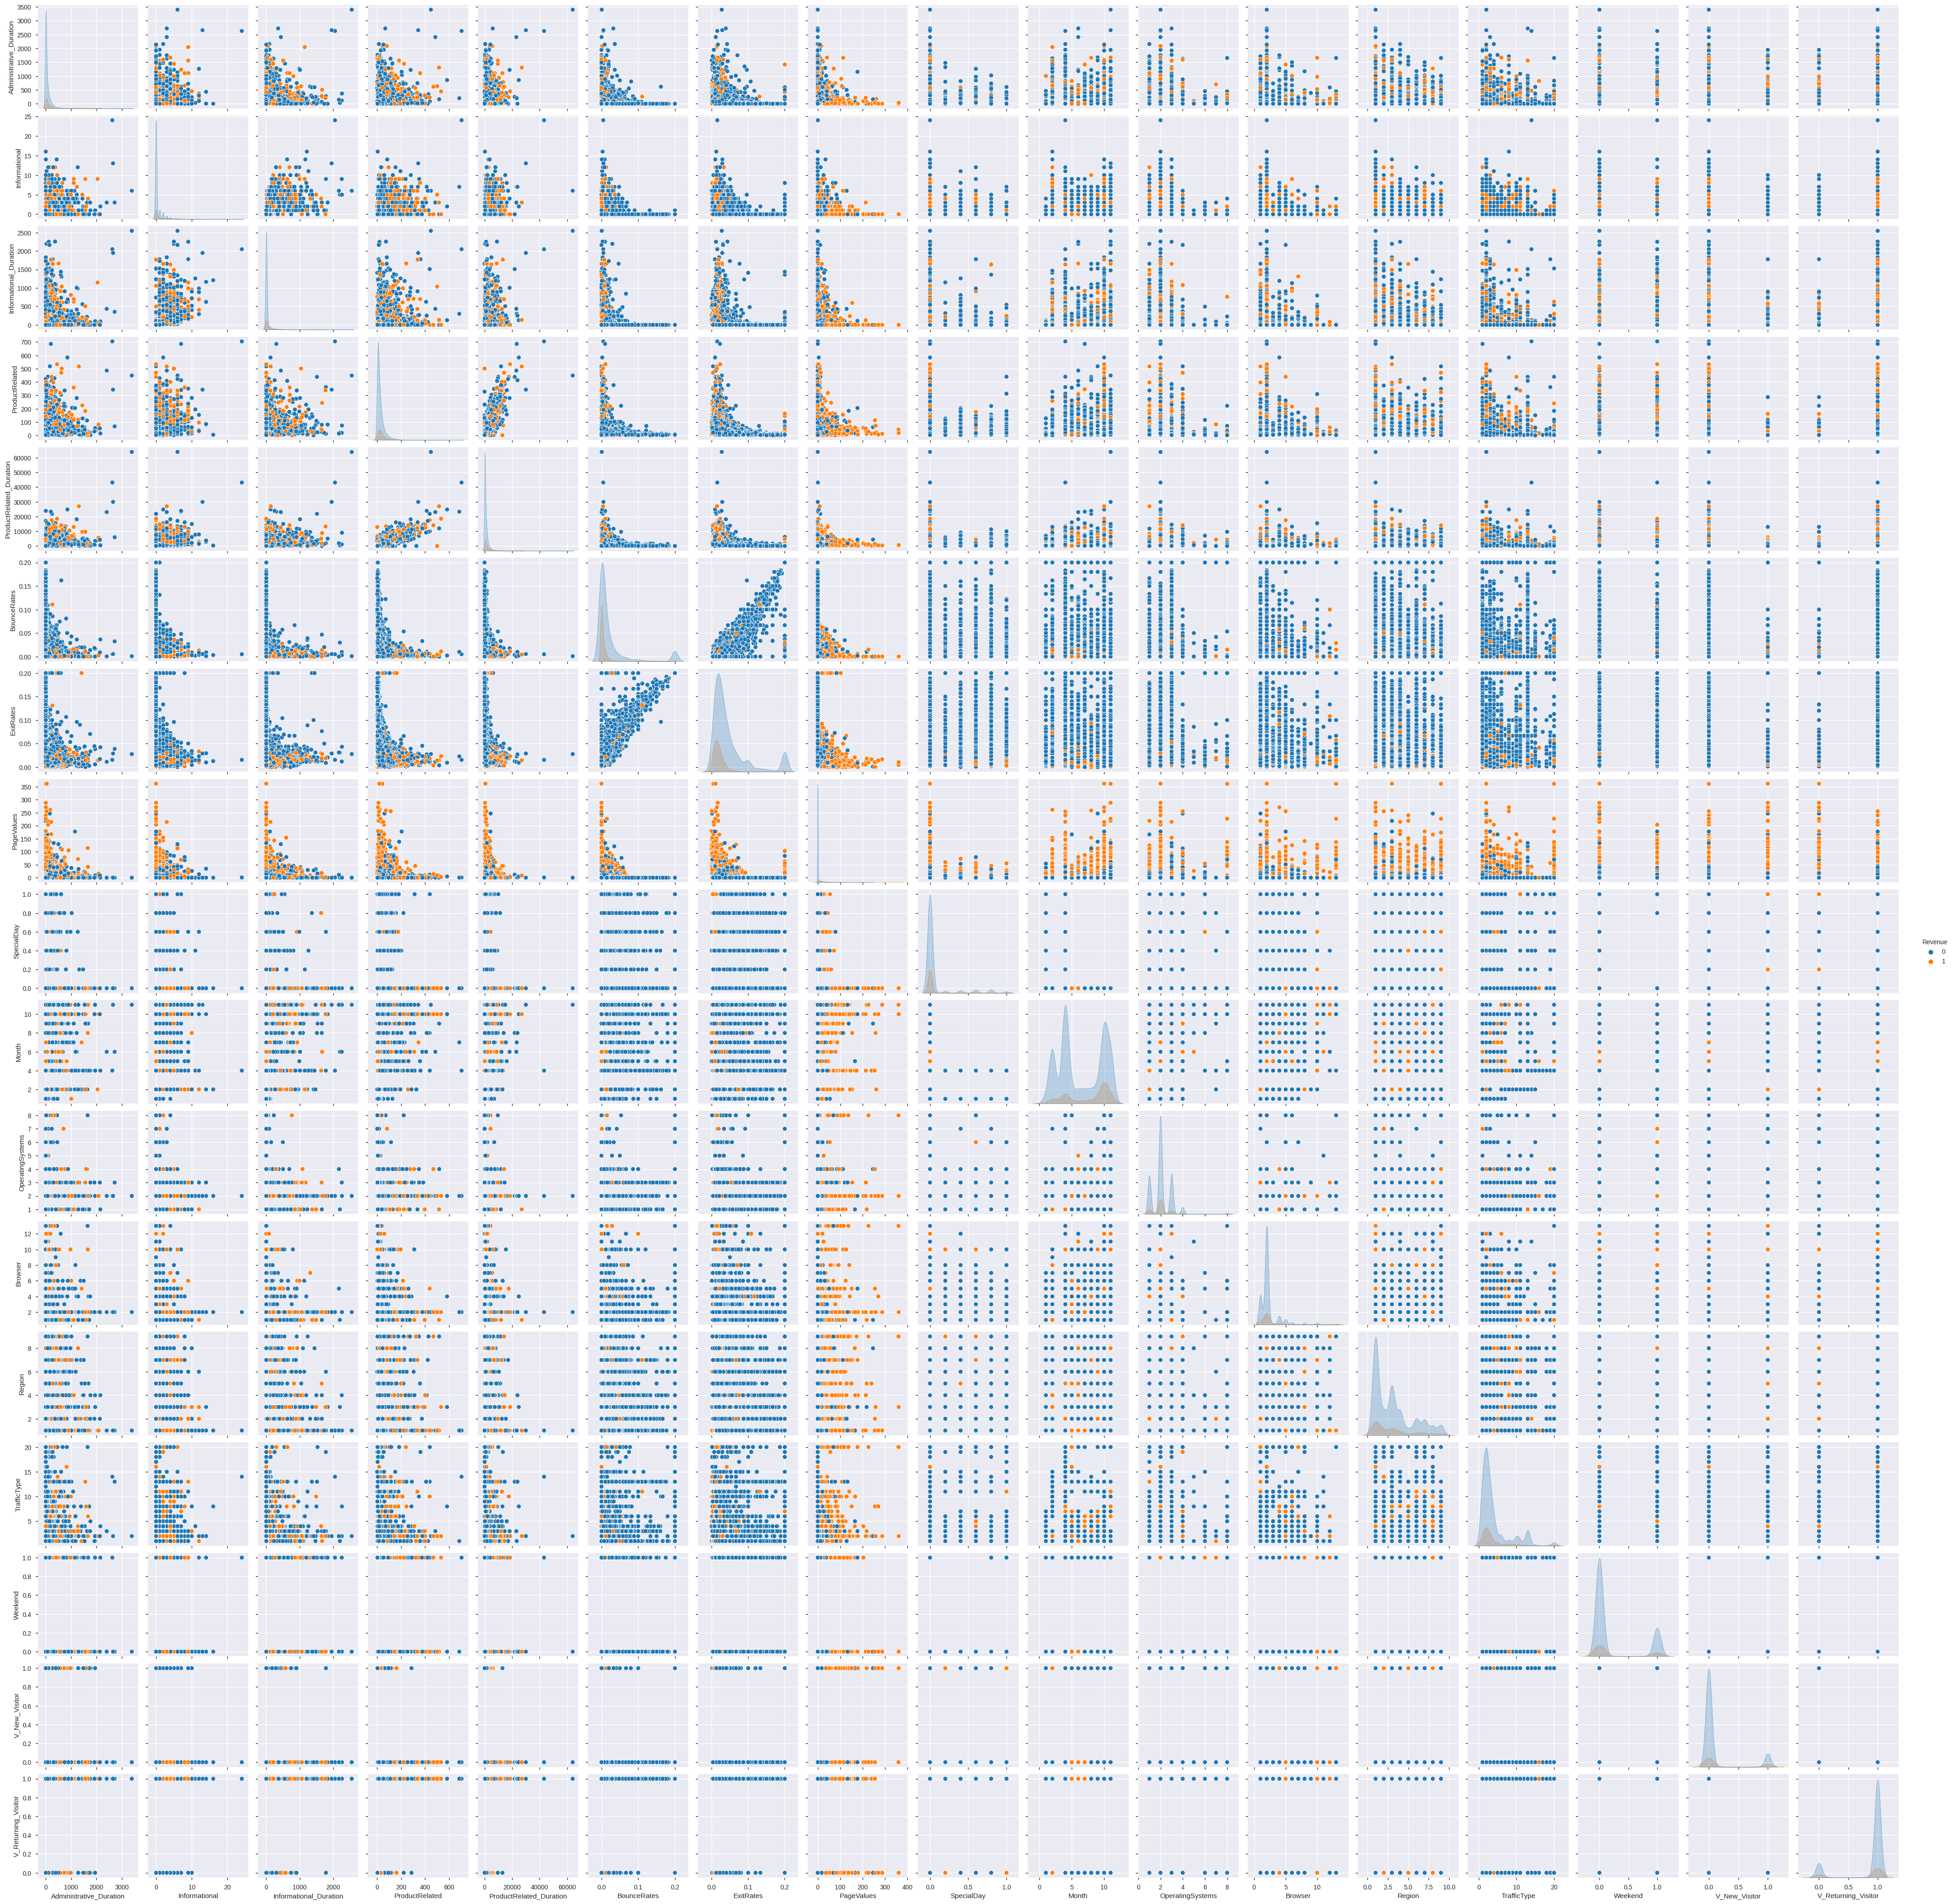

In [98]:
sb.pairplot(newdf, hue='Revenue')

# SVM model

In [100]:
newdfSVM = newdf

Splitting dataframe

In [103]:
training, val = train_test_split(newdfSVM, train_size=0.80, random_state=32, stratify=newdfSVM['Revenue'])
train, test = train_test_split(training, train_size=0.80, random_state=32, stratify=training['Revenue'])

In [104]:
X_train = train.drop(columns=['Revenue'])
y_train = train['Revenue']

X_test = test.drop(columns=['Revenue'])
y_test = test['Revenue']

X_val = val.drop(columns=['Revenue'])
y_val = val['Revenue']

Support Vector Classifier

In [140]:
svc_clf = SVC().fit(X_train, y_train)
svc_clf.score(X_train, y_train)



svc_y_test_pred = svc_clf.predict(X_test)

print(classification_report(y_test, svc_y_test_pred, target_names=['No Revenue', 'Revenue']))
svcReport = classification_report(y_test, svc_y_test_pred, target_names=['No Revenue', 'Revenue'])

              precision    recall  f1-score   support

  No Revenue       0.91      0.97      0.94      3146
     Revenue       0.73      0.44      0.55       553

    accuracy                           0.89      3699
   macro avg       0.82      0.71      0.75      3699
weighted avg       0.88      0.89      0.88      3699



and Now confusion matrix in modeled

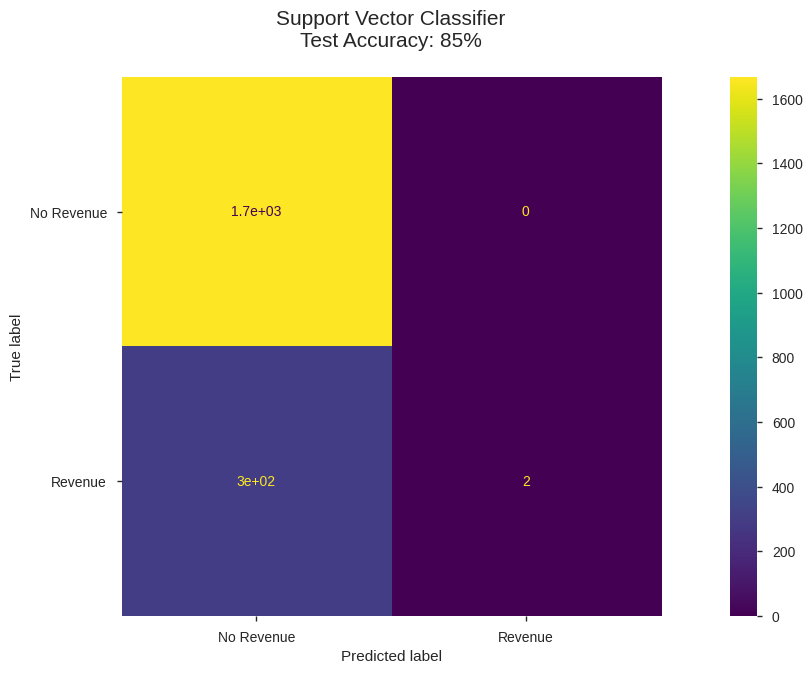

In [107]:
svc_test_acc = round(accuracy_score(y_test, svc_y_test_pred) * 100)
plot_confusion_matrix_SVM = plot_confusion_matrix(svc_clf, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'Support Vector Classifier\nTest Accuracy: {svc_test_acc}%\n', size=15)
plt.grid(False)


# KNN model

In [109]:
newdfKNN = newdf

Splitting

In [112]:
training, val = train_test_split(newdfKNN, train_size=0.80, random_state=32, stratify=newdfKNN['Revenue'])
train, test = train_test_split(training, train_size=0.80, random_state=32, stratify=training['Revenue'])

X_train = train.drop(columns=['Revenue'])
y_train = train['Revenue']

X_test = test.drop(columns=['Revenue'])
y_test = test['Revenue']

X_val = val.drop(columns=['Revenue'])
y_val = val['Revenue']


KNN

In [143]:
knn = KNeighborsClassifier()

classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))
knnReport = classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue'])

[[3078   68]
 [ 376  177]]
              precision    recall  f1-score   support

  No Revenue       0.89      0.98      0.93      3146
     Revenue       0.72      0.32      0.44       553

    accuracy                           0.88      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



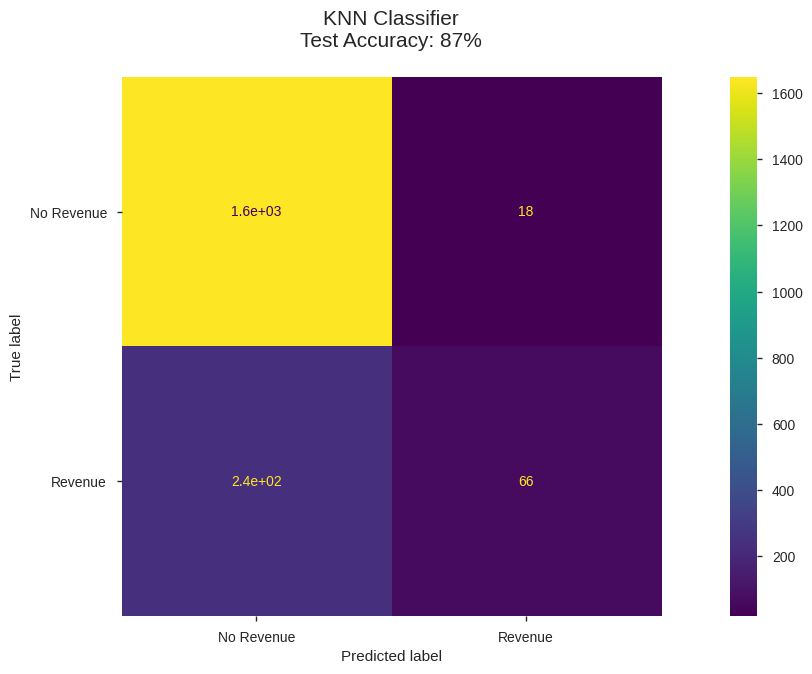

In [115]:
svc_test_acc = round(accuracy_score(y_test, y_pred) * 100)
plot_confusion_matrix_KNN= plot_confusion_matrix(classifier, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'KNN Classifier\nTest Accuracy: {svc_test_acc}%\n', size=15)
plt.grid(False)


Calculating error for K values between 1 and 40, in the cell  117 the best K is shown

Text(0, 0.5, 'Mean Error')

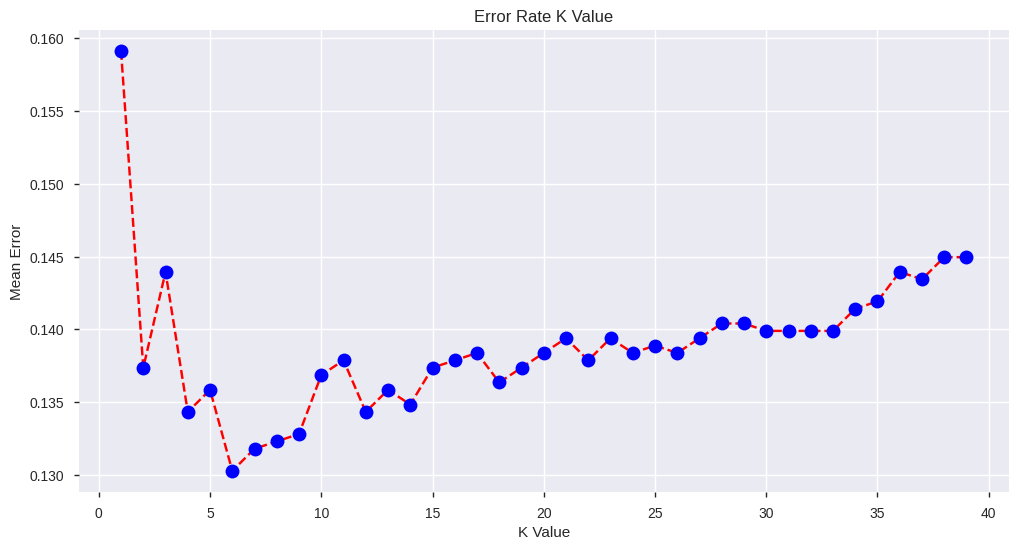

In [117]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


# Logestic Regression

In [119]:
newdflog= newdf

 Splitting and Scaling logestic 

In [121]:
y = newdf['Revenue'].copy()
X = newdf.drop('Revenue', axis=1)

scaler = StandardScaler()

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)

my approach for drawing error, therfore C= 5 based on cross K validation

Text(0, 0.5, 'Mean Error')

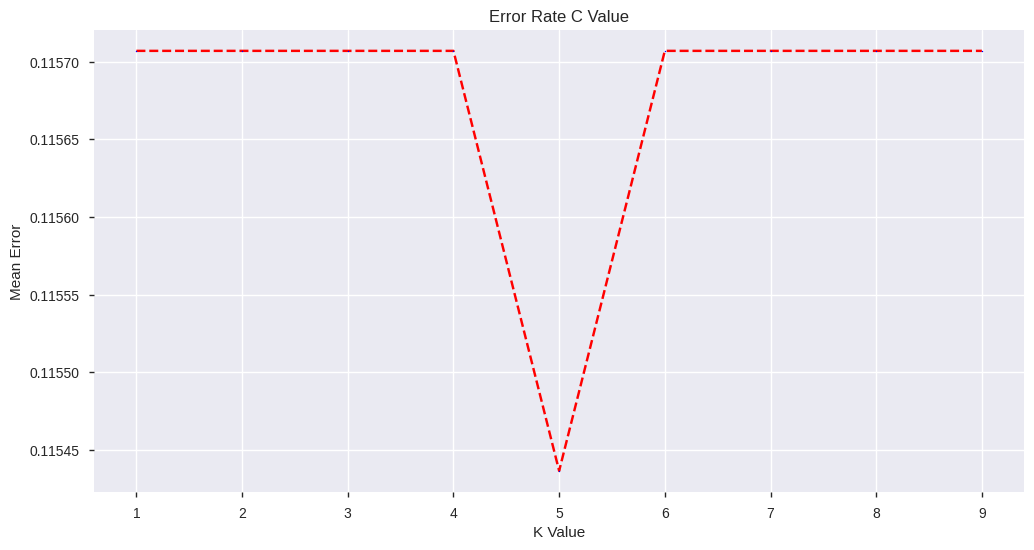

In [123]:
error = []
for i in range(1, 10):
    lr = LogisticRegression(C = i)
    lr.fit(X_train,y_train)
    pred_i = lr.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize= 1)
plt.title('Error Rate C Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


Logestic Reg

In [124]:
lr = LogisticRegression(C = 5)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

In [144]:
print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue']))
logReport = classification_report(y_test, y_pred, target_names=['No Revenue', 'Revenue'])

[[3078   68]
 [ 376  177]]
              precision    recall  f1-score   support

  No Revenue       0.89      0.98      0.93      3146
     Revenue       0.72      0.32      0.44       553

    accuracy                           0.88      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699



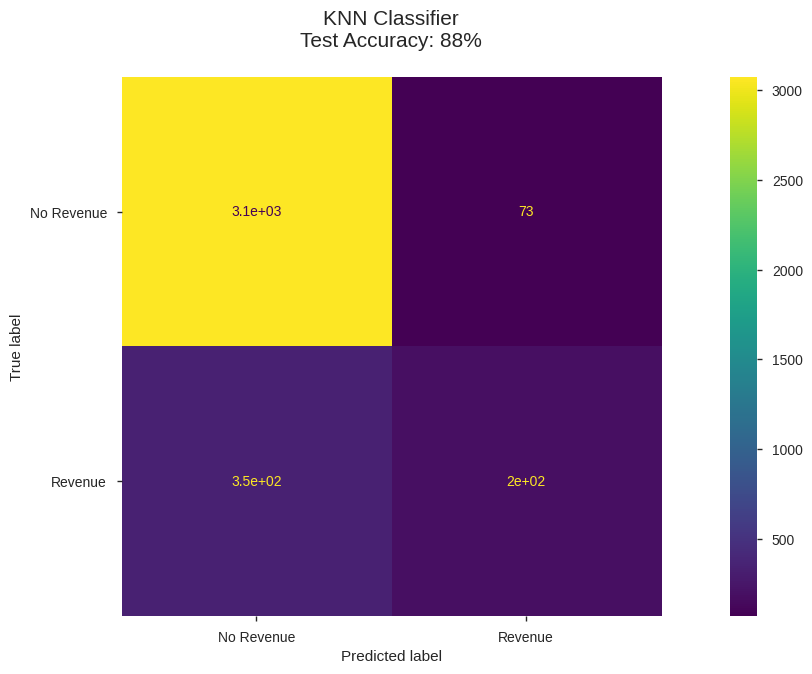

In [127]:
svc_test_acc = round(accuracy_score(y_test, y_pred) * 100)
plot_confusion_matrix_log = plot_confusion_matrix(lr, X_test, y_test, display_labels=['No Revenue', 'Revenue'])
plt.title(f'KNN Classifier\nTest Accuracy: {svc_test_acc}%\n', size=15)
plt.grid(False)

# conclusion and all Reports

SVM Report

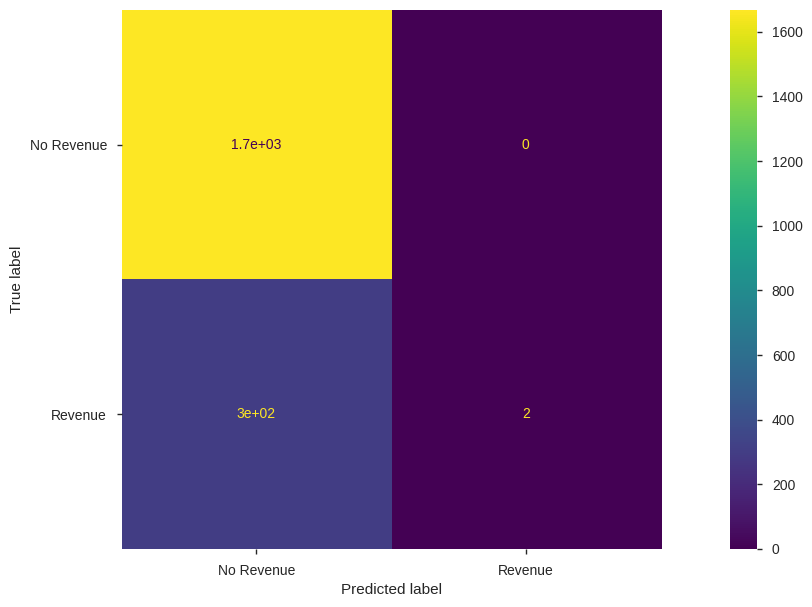

In [153]:
plot_confusion_matrix_SVM.plot()
plt.grid(False)

KNN Report

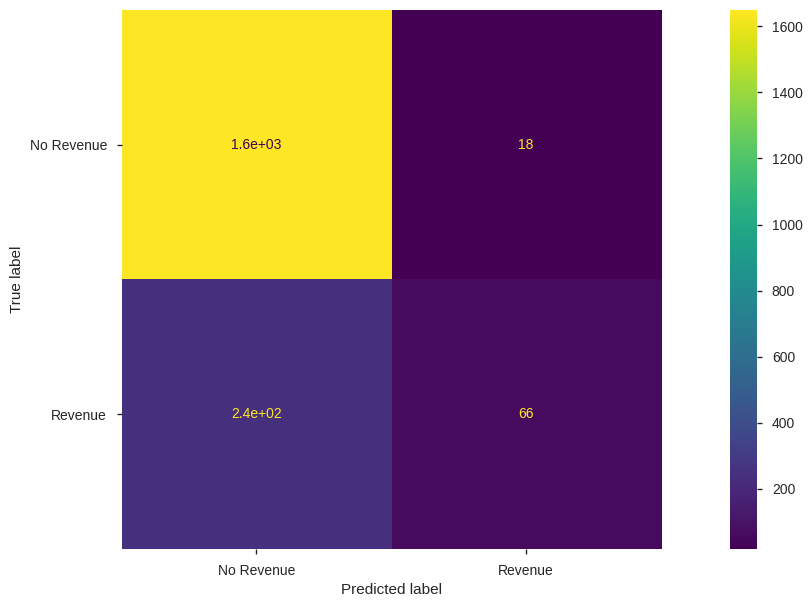

In [154]:
plot_confusion_matrix_KNN.plot()
plt.grid(False)

Logestic Report

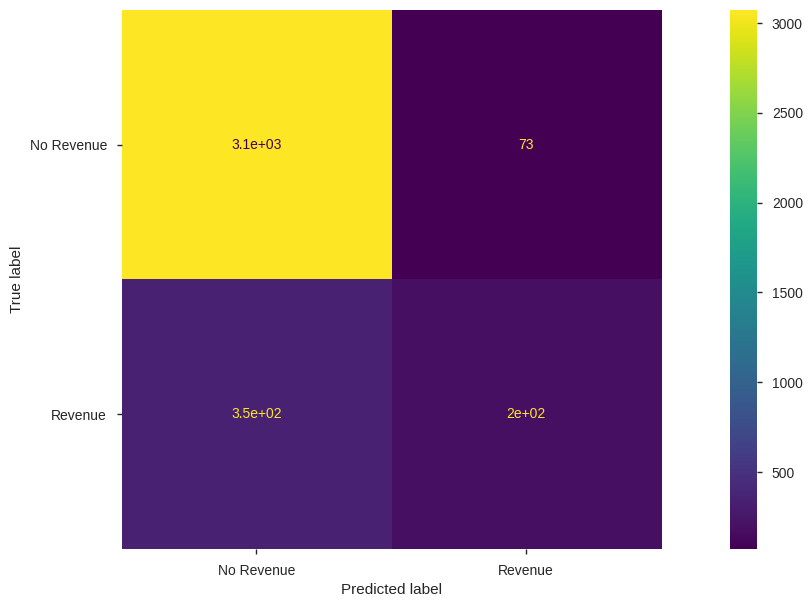

In [152]:
plot_confusion_matrix_log.plot()
plt.grid(False)

In [148]:
print("---------------SVM Report---------------")
print(svcReport)
print("---------------KNN Report---------------")
print(knnReport)
print("---------------Logestic Report---------------")
print(logReport)

---------------SVM Report---------------
              precision    recall  f1-score   support

  No Revenue       0.91      0.97      0.94      3146
     Revenue       0.73      0.44      0.55       553

    accuracy                           0.89      3699
   macro avg       0.82      0.71      0.75      3699
weighted avg       0.88      0.89      0.88      3699

---------------KNN Report---------------
              precision    recall  f1-score   support

  No Revenue       0.89      0.98      0.93      3146
     Revenue       0.72      0.32      0.44       553

    accuracy                           0.88      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.87      0.88      0.86      3699

---------------Logestic Report---------------
              precision    recall  f1-score   support

  No Revenue       0.89      0.98      0.93      3146
     Revenue       0.72      0.32      0.44       553

    accuracy                           0.88      3699


Based on reports, SVM has higher accuracy compared with other, SVM predict No Revenue and Revenue higher than others and KNN and logistic are similar